## Info 113 Introduction to Data Science
## Homework 2: VI-ME-BA-BAR on real data

# Utilities
When authoring a report on a data analysis -- like this document -- the aim is to make the code as readable as possible, highlighting *what* is being computed, and abstracting away the *technical details*.

With Jupyter notebooks, this is typically achieved by implementing a collection of utilities in separate *code files*. A nice feature is that one can use *introspection* to quickly look at the code of the utilities, and hence explore the details when so desired (see below).

For this analysis, several such utilities are provided in the [code subdirectory](code/). At this stage we do not expect you to be able to rewrite all of them, but you should definitely check them out and try to understand them.
You will implement some additional ones of your own design.

We first load the Python libraries that will be used in this analysis:

In [1]:
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2

and the utilities:

In [2]:
code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *
from my_utilities import *

Now you can look at the documentation of the function `get_images` with `get_images?` (*what it does*):

And its code (*how it does it*) with `get_images??`:

# Step 1: {VI}sualization and data preprocessing 

Data often come already in a feature representation, but not always. As an exercise, we are going to guide you through a simple preprocessing feature extraction process.

## Preprocessing
Let's load the images from the dataset, and have a look at them:

In [3]:
data_dir = './mini-dataset'
a_images = get_images(data_dir, 'a*.png')
b_images = get_images(data_dir, 'b*.png')
images = a_images + b_images

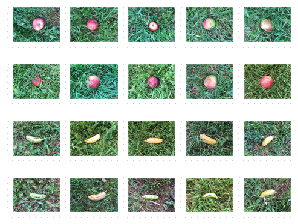

In [4]:
show_images(images)

As can be seen, there is a lot of irrelevant background in these images. The first step of the preprocessing will be to *crop* them. 

**Work through the [cropping](cropping.ipynb) worksheet and come back here.**

Here are all the images after cropping:

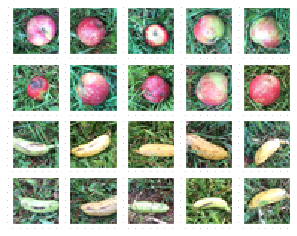

In [5]:
cropped_images = [crop_image(img) for img in images]
show_images(cropped_images)

Still a lot of grass showing up. The second step of the preprocessing will be to make the background (grass) transparent.

**Work through the [foreground_extraction](foreground_extraction.ipynb) worksheet and come back here.**

Here are all the images after cropping and making the background transparent:

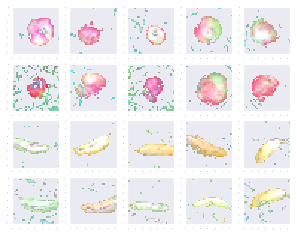

In [6]:
show_images([transparent_background_filter(img) for img in cropped_images])

This will do as preprocessing. It's now time to move on to the feature extraction itself.

**Work through the [feature_extraction](feature_extraction.ipynb) worksheet and come back here.**

## Preprocess and visualize all the data
At this stage we do not expect you to be able to write the code to preprocess and visualize data, but check it out and try to understand it un `utilities.py`.

In [ ]:
# Create a data array X with all samples (from a_files and b_files) 
#in lines and features (redness and elongation) in column. 
# Also create a column array with the `truth values`, +1 for Apple and -1 for Banana.
X, Y = preprocess_data(data_dir, extract_features)

In [ ]:
# Show the values in X and Y
pretty_print(X, Y, column_names=['redness', 'elongation', 'fruit'])

In [ ]:
# Show the values as a heat map
heat_map(X, Y, column_names=['redness', 'elongation', 'fruit'])

In [ ]:
# For better rendering and improved results, the features are standardized.
# This means that for each column vector we subtract the mean and divide by the standard deviation
X, Y = preprocess_data(data_dir, extract_features, standardize=True)
heat_map(X, Y, column_names=['redness', 'elongation', 'fruit'])

In [ ]:
# Make one training-test split in a stratified manner 
train_index, test_index = split_data(X, Y, verbose = True, seed=0)
Xtrain, Xtest = X[train_index], X[test_index]
Ytrain, Ytest = Y[train_index], Y[test_index]

In [ ]:
# Show the images in the order of the train/test split:
# Training data first.
F = np.array(a_files + b_files)
all_files = np.concatenate((F[train_index],F[test_index]))
show_images(all_files, crop_image)

In [ ]:
# Plot training and test data as heat maps
#heat_map(Xtrain, Ytrain, column_names=['redness', 'elongation', 'fruit'])
#heat_map(Xtest, Ytest, column_names=['redness', 'elongation', 'fruit'])

In [ ]:
# Plot training and test data as scatter plots
make_scatter_plot(X, F, train_index, test_index, filter=transparent_background_filter)

# Step 2: {ME}tric definition

### Question 8: Error rate
Write a function that implements the error rate metric. Follow this template:

    def error_rate(solution, prediction):
    # Put your code here.
    return e
    
Then write unit tests what check that the error rate between `solution=Ytrain` and `prediction=Ytrain` is zero, that between `solution=Ytrain` and `prediction=np.zeros(Ytrain.shape)` is one and the between `solution=Ytrain` and `prediction=np.ones(Ytrain.shape)` is 0.5.

In [ ]:
# Solution to question 8
def error_rate(solution, prediction):
    '''Compute the error rate between two vectors.'''
    e = np.mean(solution!=prediction)
    return e

assert(error_rate(Ytrain, Ytrain) == 0)
assert(error_rate(Ytrain, np.zeros(Ytrain.shape)) == 1)
assert(error_rate(Ytrain, np.ones(Ytrain.shape)) == 0.5)

### Question 9: Accuracy score
The library `scikit_learn` also called `sklearn` has a function `accuracy_score`. Check that `error_rate` = `1-accuracy_score` using the same examples as above. As part of this question you need to first figure out how to import the function `accuracy_score`. Look this up on the Internet.

In [ ]:
# Solution to question 9
from sklearn.metrics import accuracy_score
assert(error_rate(Ytrain, Ytrain) == 1-accuracy_score(Ytrain, Ytrain))
assert(error_rate(Ytrain, np.zeros(Ytrain.shape)) == 1-accuracy_score(Ytrain, np.zeros(Ytrain.shape)))
assert(error_rate(Ytrain, np.ones(Ytrain.shape)) == 1-accuracy_score(Ytrain, np.ones(Ytrain.shape)))

# Step 3: {BA}seline results
The 1-nearest neighbor classifier is a nice and simple method. Luckily it is implemented in `scikit-learn`. You may also want to implement it yourself as part of your project.

### Question 10: 1-nearest-neighbor classifier
Import the `KNeighborsClassifier` classifier from `scikit-learn`. Set the number of neighbors to one. Train a model with `Xtrain` by calling the method `fit`. Then use the trained model to create two vectors of prediction `Ytrain_predicted` and `Ytest_predicted` by calling the method `predict`. Compute `e_tr`, the training error rate, and `e_tr` the test error rate.

WARNING: `scikit-learn` uses lists for prediction labels instead of column vectors. You will have to replace `Ytrain` by `Ytrain.ravel()` and `Ytest` by `Ytest.ravel()` to avoid an error message and wrong error rates.

In [ ]:
# Solution to question 10
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain, Ytrain.ravel()) 
Ytrain_predicted = neigh.predict(Xtrain)
Ytest_predicted = neigh.predict(Xtest)
e_tr = error_rate(Ytrain.ravel(), Ytrain_predicted)
e_te = error_rate(Ytest.ravel(), Ytest_predicted)
print("NEAREST NEIGHBOR CLASSIFIER")
print("Training error:", e_tr)
print("Test error:", e_te)

### Question 11: Confusion matrix
<u>Question 11.1</u> Extract the variables `tn`, `fp`, `fn`, `tp` (true negative, false positive, false negative, and true positive) using the `confusion_matrix` function of `scikit_learn`, for test data predictions.

<u>Question 11.2</u> Show the confusion matrix as a heat map.

In [ ]:
# Solution to question 11.1
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Ytest.ravel(), Ytest_predicted).ravel()
print(tn, fp, fn, tp)

### Here we overlay the predictions on test examples on the scatter plot ...

In [ ]:
make_scatter_plot(X, F, train_index, test_index, 
                  filter=transparent_background_filter, predicted_labels=Ytest_predicted)

### ... then, we show the "ground truth" and compute the error rate

In [ ]:
make_scatter_plot(X, F, train_index, test_index, 
                  filter=transparent_background_filter, predicted_labels='GroundTruth')

In [ ]:
# Print the error rate
e_te = error_rate(Ytest.ravel(), Ytest_predicted)
print("ERROR RATE NEAREST NEIGHBOR CLASSIFIER:", e_te)

# Step 4: {BAR}s of error and test set size
Last but not least let us evaluate the significance of our results bu computing error bars. Obviously, since we have only 10 test examples, we cannot see at least 100 errors (which is the target we gave to ourselves in class). But this is only a toy example.

### Question 12: Test set error bar
Compute the 1-sigma error bar of e_te using the standard error formula defined in class. How many test examples would we need to divide this error bar by a factor of two?

In [ ]:
# Solution to question 12
n_te = len(Ytest)
sigma = np.sqrt(e_te * (1-e_te) / n_te)
print(sigma)

## Cross-validation (CV) error bar
Another way of computing an error bar is to repeat multiple times the train/test split and compute the mean and standard deviation of the test error. In some sense this is more informative because it involves both the variability of the training set and that of the test set. But is is known to be a biased estimator of the error variability.

In [ ]:
n=10
SSS = StratifiedShuffleSplit(n_splits=n, test_size=0.5, random_state=5)
E = np.zeros([n,1])
k = 0
for train_index, test_index in SSS.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    neigh.fit(Xtrain, Ytrain.ravel()) 
    Ytrain_predicted = neigh.predict(Xtrain)
    Ytest_predicted = neigh.predict(Xtest)
    e_te = error_rate(Ytest.ravel(), Ytest_predicted)
    print("TEST ERROR RATE:", e_te)
    E[k] = e_te
    k = k+1
    
e_te_ave = np.mean(E)
print("\n\nCV ERROR RATE:", e_te_ave)
print("CV STANDARD DEVIATION:", np.std(E))

sigma = np.sqrt(e_te_ave * (1-e_te_ave) / n_te)

# It is bad practice to show too many decimal digits:
# print("STANDARD ERROR BAR:", sigma)
print("STANDARD ERROR BAR: {0:.2f}".format(sigma))

## Extra credit: Your own classifier

### Question 13: Create a classifier

<u>Question 13.1</u>: Predict function. Add one line of code in the example below that creates a classifier which uses G = Redness - Elongation as a discriminant value and classifies a new example as an apple if G>=0 and as a banana if G<0.

    def predict(X):
        '''Function taking an array X of unlabeled examples as input and returning the predicted label vector Y.'''
        # YOUR CODE HERE
        return Y
        
<u>Question 13.2</u>: Make predictions. Find predicted values for the training examples Xtrain and the test examples Xtest. 

<u>Question 13.3</u>: Compute the error rate of your predictions.

<u>Question 13.4</u>: Show the training and test data on separate scatter plots. Plot the decision boundary G = 0 (that is Redness = Elongation or $x_1=x_2$).

In [ ]:
# Solution to question 13.1
def predict(X):
    '''Function taking an array X of unlabeled examples as input and returning the predicted label vector y.'''
    G = X[:,0]-X[:,1]
    Y = np.ones([X.shape[0],1])
    Y[G<0] = -1
    return Y

In [ ]:
# Solution to question 13.2
Ytrain_predicted = predict(Xtrain)
Ytest_predicted = predict(Xtest)

In [ ]:
# Solution to question 13.3
e_tr = error_rate(Ytrain, Ytrain_predicted)
e_te = error_rate(Ytest, Ytest_predicted)
print("MY FIRST CLASSIFIER")
print("Training error:", e_tr)
print("Test error:", e_te)

In [ ]:
make_scatter_plot(X, F, train_index, [], 
                  filter=transparent_background_filter, predicted_labels='GroundTruth',
                 show_diag=True)
make_scatter_plot(X, F, [], test_index, 
                  filter=transparent_background_filter, predicted_labels='GroundTruth',
                 show_diag=True)